# Grafo conector de destinos

In [1]:
import pandas as pd
import numpy as np
from math import radians, sin, cos, sqrt, atan2

df_destinos = pd.read_csv('../DestinosConAeropuertos/destinos_tiene_aeropuerto_column.csv')
df_destinos

,nombre,categoria,tipo,ciudad,municipio,estado,codigopostal,lat,lon,min_lat,max_lat,min_lon,max_lon,id_estado,id_municipio,tiene_aeropuerto,id
0,Cabo San Lucas,place,city,Cabo San Lucas,Los Cabos,Baja California Sur,23470,22.893888,-109.920060,22.733888,23.053888,-110.080060,-109.760060,3.0,3008.0,1,1
1,Cancún,boundary,administrative,Cancún,Benito Juárez,Quintana Roo,unkwown,21.152747,-86.842576,20.970585,21.212375,-86.995617,-86.740526,23.0,23005.0,1,2
2,Loreto,place,town,unkwown,Loreto,Baja California Sur,23880,26.009791,-111.345252,25.969791,26.049791,-111.385252,-111.305252,3.0,3009.0,1,3
3,San José del Cabo,place,city,San José del Cabo,Los Cabos,Baja California Sur,23400,23.059836,-109.702515,22.899836,23.219836,-109.862515,-109.542515,3.0,3008.0,1,4
4,Ixtapa,boundary,administrative,unkwown,Ixtapa,Chiapas,unkwown,16.807623,-92.898650,16.684633,16.930706,-93.020620,-92.811072,7.0,7044.0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,"Terrenos del Lote ""La Asunción""",boundary,administrative,unkwown,Tuxpan,Veracruz,92773,21.022504,-97.467442,20.906822,21.138042,-97.629830,-97.325482,NaN,NaN,0,221
221,"Terrenos del Lote ""La Isla""",boundary,administrative,unkwown,Tuxpan,Veracruz,unkwown,21.048225,-97.363323,20.963239,21.133552,-97.416243,-97.301713,NaN,NaN,0,222
222,Tuxpan,place,city,Tuxpan,Tuxpan,Veracruz,92800,20.951838,-97.404537,20.791838,21.111838,-97.564537,-97.244537,NaN,NaN,0,223
223,"Terrenos del Lote ""Álamo""",boundary,administrative,unkwown,Álamo Temapache,Veracruz,92730,20.867075,-97.676765,20.806173,20.927458,-97.701500,-97.662393,NaN,NaN,0,224


## Generar matriz de adyacencia primero con distancias

In [2]:
def calcular_distancia(lat1, lon1, lat2, lon2):
    R = 6371.0  # Radio de la Tierra en km

    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)

    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c


In [3]:
matriz = np.zeros((len(df_destinos), len(df_destinos)))

for org_idx, org_row in df_destinos.iterrows():
    for dest_idx, dest_row in df_destinos.iterrows():
        if org_idx == dest_idx:
            matriz[org_idx][dest_idx] = 0
            continue

        matriz[org_idx][dest_idx] = calcular_distancia(org_row['lat'], org_row['lon'], dest_row['lat'], dest_row['lon'])

### Normalizar la matriz de 0 a 100

In [4]:
min_matriz = np.min(matriz)
max_matriz = np.max(matriz)

normalized_matriz = ((matriz - min_matriz) / (max_matriz - min_matriz)) * 100
normalized_matriz

array([[ 0.        , 72.94565194, 11.48182359, ..., 40.03305242,
        39.24746954, 39.33805185],
       [72.94565194,  0.        , 78.03399522, ..., 33.53343556,
        34.41376848, 34.32187491],
       [11.48182359, 78.03399522,  0.        , ..., 46.74116481,
        46.07459023, 46.1592161 ],
       ...,
       [40.03305242, 33.53343556, 46.74116481, ...,  0.        ,
         0.91189976,  0.82577864],
       [39.24746954, 34.41376848, 46.07459023, ...,  0.91189976,
         0.        ,  0.09224718],
       [39.33805185, 34.32187491, 46.1592161 , ...,  0.82577864,
         0.09224718,  0.        ]], shape=(225, 225))

## Generación dataframe distancias

In [5]:
df_distancias = pd.DataFrame(normalized_matriz)
df_distancias

,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,0.000000,72.945652,11.481824,0.884846,58.212345,32.107707,71.900533,73.238533,72.505084,72.477592,...,36.842184,34.994379,26.584607,25.107794,34.948736,39.788810,40.095548,40.033052,39.247470,39.338052
1,72.945652,0.000000,78.033995,72.268930,24.449339,48.658949,2.976390,0.446036,1.926569,2.010832,...,36.624471,40.063271,51.781213,50.787027,49.305868,33.720965,33.386755,33.533436,34.413768,34.321875
2,11.481824,78.033995,0.000000,11.249333,66.171221,41.988925,77.386139,78.277098,77.858215,77.842072,...,43.628865,42.922488,27.420865,27.477881,34.002799,46.460433,46.726964,46.741165,46.074590,46.159216
3,0.884846,72.268930,11.249333,0.000000,57.740787,31.844355,71.246921,72.559111,71.843728,71.816906,...,36.241976,34.489995,25.711753,24.261729,34.065356,39.185106,39.489323,39.432530,38.654801,38.745075
4,58.212345,24.449339,66.171221,57.740787,0.000000,28.259140,21.746429,24.894338,22.818292,22.742772,...,23.005078,23.319263,44.931444,42.370478,46.957781,20.533930,20.356615,20.223535,20.669724,20.598799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,39.788810,33.720965,46.460433,39.185106,20.533930,17.427483,32.362541,34.057419,33.055843,33.019981,...,2.952010,7.120411,24.533796,21.848989,27.771825,0.000000,0.341982,0.312589,0.849629,0.781190
221,40.095548,33.386755,46.726964,39.489323,20.356615,17.736311,32.035295,33.722588,32.726098,32.690450,...,3.269502,7.447341,24.667826,22.016114,27.799272,0.341982,0.000000,0.353062,1.171030,1.095063
222,40.033052,33.533436,46.741165,39.432530,20.223535,17.426028,32.155471,33.872065,32.854965,32.818544,...,3.190882,7.167574,24.846160,22.160839,28.064558,0.312589,0.353062,0.000000,0.911900,0.825779
223,39.247470,34.413768,46.074590,38.654801,20.669724,16.578437,33.014123,34.754390,33.721229,33.684149,...,2.447658,6.276322,24.561709,21.787457,28.064731,0.849629,1.171030,0.911900,0.000000,0.092247


## Obtener los k destinos más cercanos a cada destino

In [6]:
K = 5  # Number of lowest-weight neighbors per vertex

# Replace 0s and self-connections with np.inf to ignore them
adj_masked = df_distancias.mask((df_distancias == 0) | (np.eye(len(df_distancias), dtype=bool)), np.inf)
# Get the indices (column names) of the K smallest values per row
k_neighbors = adj_masked.apply(lambda row: row.nsmallest(K).index.tolist(), axis=1)

# Convert to list of lists
k_neighbors_list = k_neighbors.tolist()

print(k_neighbors_list)

[[3, 144, 16, 28, 35], [7, 212, 8, 9, 15], [205, 206, 122, 16, 35], [144, 0, 16, 28, 35], [53, 112, 44, 156, 27], [202, 191, 140, 14, 193], [210, 9, 213, 8, 15], [1, 212, 8, 9, 15], [9, 15, 6, 212, 1], [8, 15, 6, 210, 213], [62, 61, 74, 201, 59], [38, 99, 95, 203, 204], [31, 34, 48, 33, 43], [19, 179, 163, 176, 178], [203, 204, 49, 5, 202], [9, 8, 6, 210, 213], [144, 3, 0, 35, 2], [26, 147, 169, 148, 165], [182, 28, 180, 29, 177], [13, 179, 163, 176, 178], [130, 131, 133, 134, 128], [45, 34, 82, 12, 166], [100, 211, 40, 209, 158], [43, 48, 31, 33, 46], [75, 84, 58, 30, 122], [199, 200, 55, 156, 134], [17, 147, 148, 165, 169], [44, 112, 4, 53, 40], [120, 35, 18, 30, 29], [92, 18, 28, 218, 75], [35, 120, 122, 205, 28], [48, 43, 33, 23, 12], [121, 206, 205, 207, 122], [43, 31, 23, 34, 48], [33, 12, 45, 31, 43], [30, 120, 122, 28, 205], [158, 137, 138, 136, 135], [194, 197, 193, 196, 23], [99, 11, 95, 134, 111], [86, 76, 109, 214, 153], [198, 44, 55, 4, 27], [88, 90, 66, 81, 89], [50, 108,

In [7]:
# Comprobando que sí funcione esta wea
for idx, row in df_destinos.iterrows():
    print(df_destinos.iloc[k_neighbors[idx]])

                     nombre categoria            tipo             ciudad  \
3         San José del Cabo     place            city  San José del Cabo   
144  Municipio de Los Cabos  boundary  administrative            unkwown   
16                   La Paz     place            city             La Paz   
28                 Culiacán     place            city           Culiacán   
35               Los Mochis  boundary  administrative         Los Mochis   

                  municipio               estado codigopostal        lat  \
3                 Los Cabos  Baja California Sur        23400  23.059836   
144  Municipio de Los Cabos  Baja California Sur      unkwown  23.271848   
16                   La Paz  Baja California Sur        23020  24.161995   
28                 Culiacán              Sinaloa        80220  24.797897   
35                    Ahome              Sinaloa      unkwown  25.792806   

            lon    min_lat    max_lat     min_lon     max_lon  id_estado  \
3   -109.7

## Generando ahora sí la matriz de adyacencia

In [8]:
print(df_distancias.iloc[0][3])

0.8848456332589238


In [9]:
# Los pesos se generan tomando la distancia entre lo destinos multiplicadas
# por escalares a y b. Estos escalares alteran los pesos para darle mayor prioridad
# a los destinos con aeropuertos.
matriz_adyacencia = np.zeros((len(df_destinos), len(df_destinos)))

# Multiplicador del valor asignado a aeropuertos
a = 0.5
# Multplicador del valor asignado a autobuses
b = 0.8

for i in range(len(df_destinos)):
    for j in range(len(df_destinos)):
        if i == j:
            # matriz_adyacencia[i][j] = np.inf
            continue

        ambos_tienen_aeropuerto = df_destinos.iloc[i]['tiene_aeropuerto'] == 1 and df_destinos.iloc[j]['tiene_aeropuerto']

        if ambos_tienen_aeropuerto:
            matriz_adyacencia[i][j] = a * df_distancias.iloc[i][j]
        elif j in k_neighbors_list[i]:
            matriz_adyacencia[i][j] = b * df_distancias.iloc[i][j]
        # else:
        #     matriz_adyacencia[i][j] = np.inf

for i in range(len(matriz_adyacencia)):
    print(matriz_adyacencia[i])

[ 0.         36.47282597  5.7409118   0.44242282 29.10617239 16.05385325
  0.          0.         36.25254187 36.23879582  0.         23.80747628
 13.91678594  0.         19.02238301 36.56065131  2.24357296 11.04123294
  5.50202703  8.35408928 22.83029814 12.11145505 31.52562855 14.91630736
 11.26855468  0.         11.33492509  0.          5.09293041  8.57183936
  6.01011967  0.         10.66860073  0.         13.33277679  5.13712592
 32.16657143 14.78358879 23.66683504 18.3046057  30.32802171 20.15633045
 16.23443042  0.          0.          0.          0.         14.80289852
  0.          0.          0.          0.         17.39508884 28.81917535
 16.73679816 28.3030109  21.38656921 10.94401877 15.90942875 18.55877791
 17.45480596  0.         19.55799554 18.08843369 11.05976594 15.62238411
  0.          0.          0.         33.9021924   0.         18.2210993
  0.          0.         18.28621571  0.          0.          0.
  0.          0.          0.          0.          0.        

# Encontrar K paths más cortos entre destinos

In [10]:
import networkx as nx
from networkx.algorithms.simple_paths import shortest_simple_paths
import matplotlib.pyplot as plt

In [11]:
# Create a graph from the adjacency matrix
G = nx.from_numpy_array(matriz_adyacencia, create_using=nx.DiGraph())

# Remove zero-weight (no connection) edges (optional if 0 means no edge)
G.remove_edges_from([(u, v) for u, v, d in G.edges(data=True) if d['weight'] == 0])

In [12]:
# Source and target vertices
source = 0
target = 2
K = 10

# Use Yen's algorithm (shortest_simple_paths returns paths sorted by total weight)
paths_generator = shortest_simple_paths(G, source, target, weight='weight')
k_best_paths = list(next(paths_generator) for _ in range(K))

In [13]:
# Print the K shortest paths
print('Origen: ', df_destinos.iloc[source]['nombre'])
print('Destino: ', df_destinos.iloc[target]['nombre'])
for i, path in enumerate(k_best_paths, 1):
    # print(f"[ {df_destinos[i]['nombre']}] ->")
    path_string = f"Path {i}: "
    for v in path:
        path_string += f"[{df_destinos.iloc[v]['nombre']}]"
        path_string += " -> "
    print(path_string)
    # print(f"Path {i}: {path}") 

Origen:  Cabo San Lucas
Destino:  Loreto
Path 1: [Cabo San Lucas] -> [Loreto] -> 
Path 2: [Cabo San Lucas] -> [La Paz] -> [Loreto] -> 
Path 3: [Cabo San Lucas] -> [San José del Cabo] -> [Loreto] -> 
Path 4: [Cabo San Lucas] -> [San José del Cabo] -> [La Paz] -> [Loreto] -> 
Path 5: [Cabo San Lucas] -> [Municipio de Los Cabos] -> [San José del Cabo] -> [Loreto] -> 
Path 6: [Cabo San Lucas] -> [Municipio de Los Cabos] -> [San José del Cabo] -> [La Paz] -> [Loreto] -> 
Path 7: [Cabo San Lucas] -> [San José del Cabo] -> [Municipio de Los Cabos] -> [La Paz] -> [Loreto] -> 
Path 8: [Cabo San Lucas] -> [Municipio de Los Cabos] -> [La Paz] -> [Loreto] -> 
Path 9: [Cabo San Lucas] -> [Los Mochis] -> [Loreto] -> 
Path 10: [Cabo San Lucas] -> [San José del Cabo] -> [Los Mochis] -> [Loreto] -> 


/tmp/ipykernel_617384/2851539227.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/usr/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


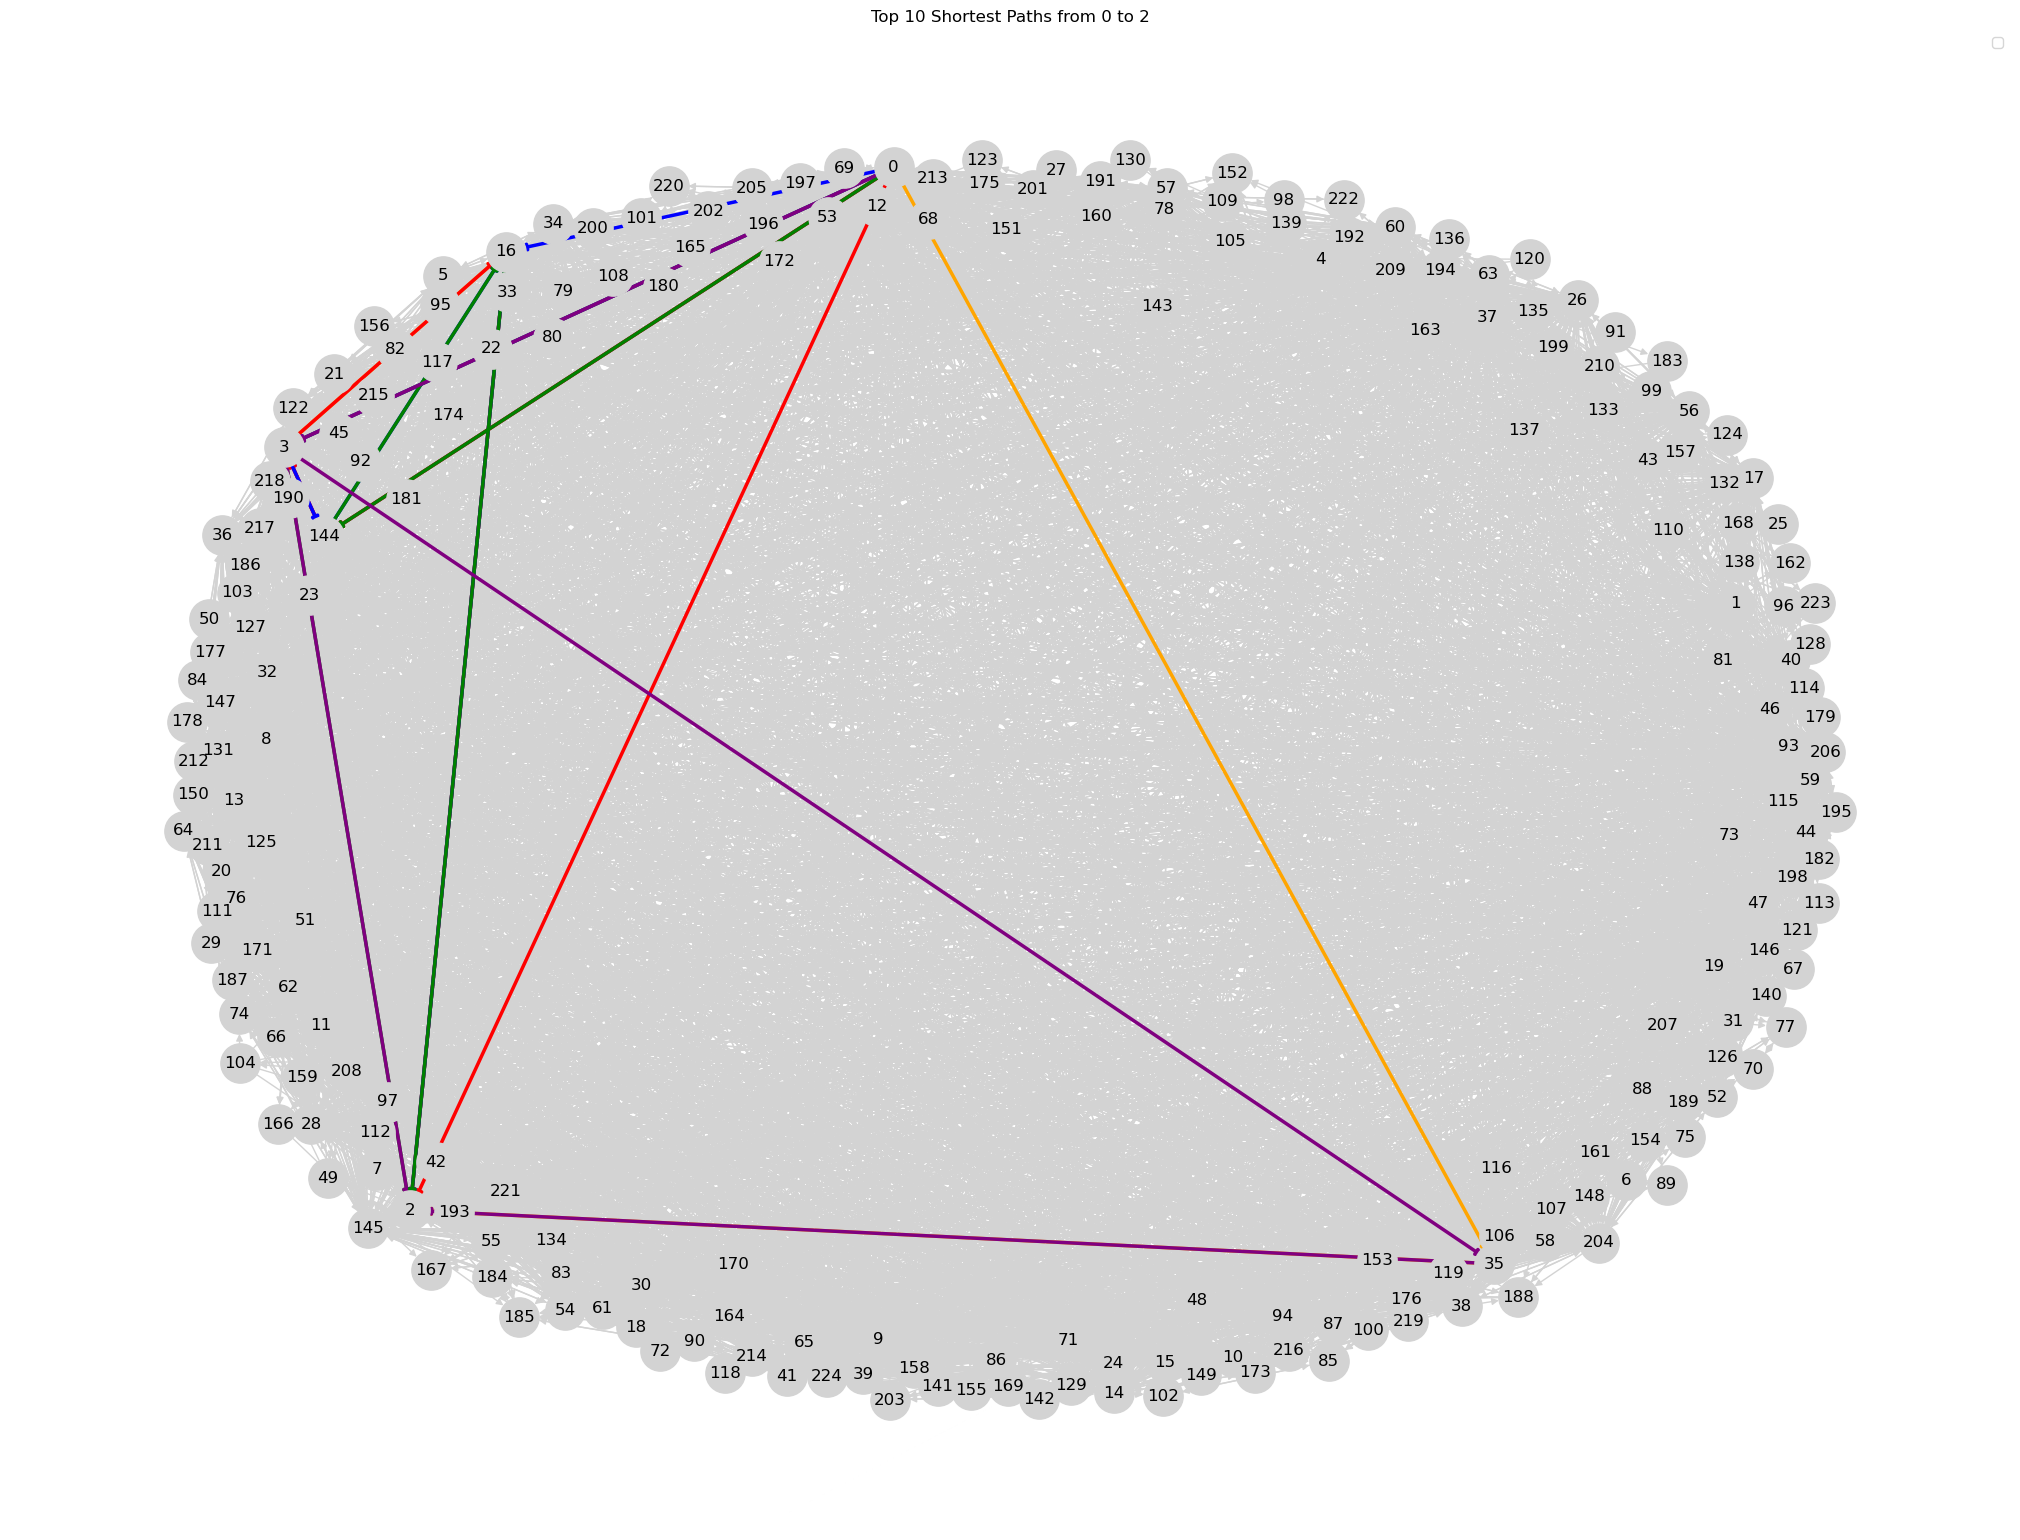

In [14]:
# Draw graph
pos = nx.spring_layout(G, seed=42, k=1000)  # Positioning algorithm for layout

plt.figure(figsize=(20, 15))

# Draw all nodes and edges
nx.draw(G, pos, with_labels=True, node_color='lightgray', edge_color='lightgray', node_size=800)
# nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)})

# Color paths differently
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, path in enumerate(k_best_paths):
    path_edges = list(zip(path[:-1], path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color=colors[i % len(colors)], width=2.5, label=f"Path {i+1}")

plt.legend()
plt.title(f"Top {K} Shortest Paths from {source} to {target}")
plt.show()

# Prueba del módulo creado

In [ ]:
import pandas as pd
import GrafoDestinos